<a href="https://colab.research.google.com/github/meriem-mkhinini/Personal-projects/blob/main/HousePricesLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [85]:
import matplotlib.colors as mcolors

In [86]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1.   Null values?

2.   numerical variables and their distribution?

3.   Categorial variable?

4.   Correlation to the sale price?



In [88]:
#features containing null values
featuresNA = [feature for feature in train_df.columns if train_df[feature].isna().sum()>1]

In [89]:
featuresNA

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

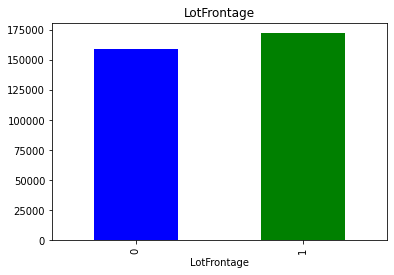

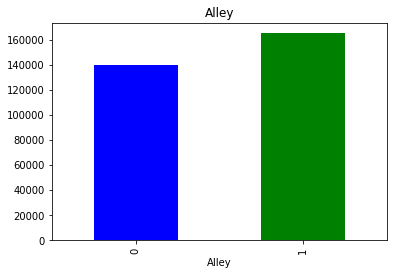

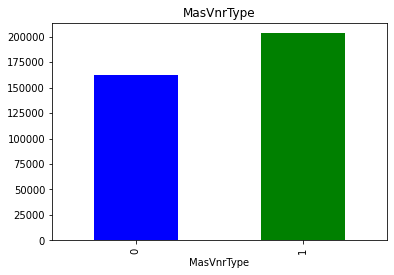

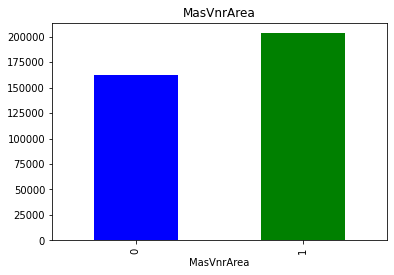

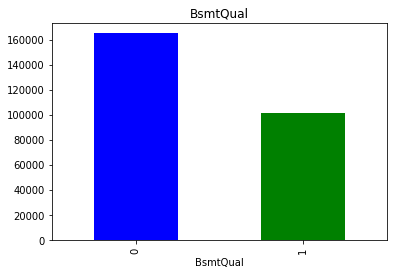

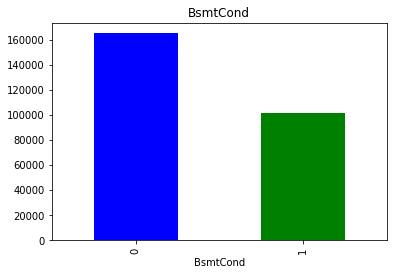

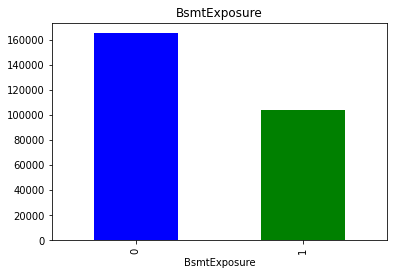

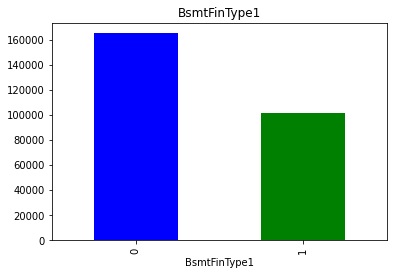

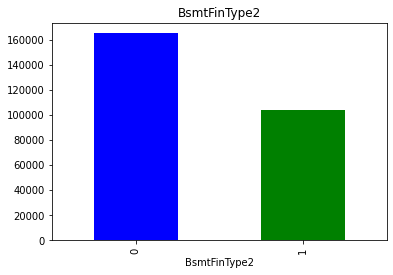

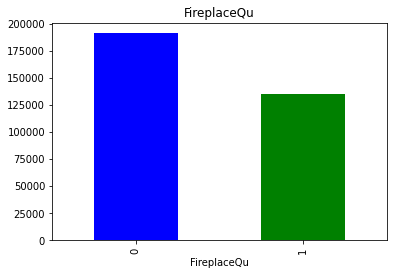

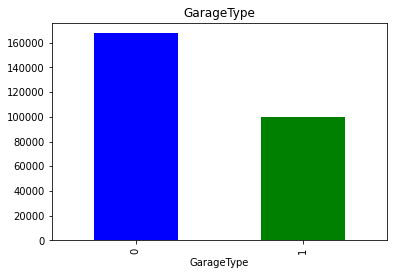

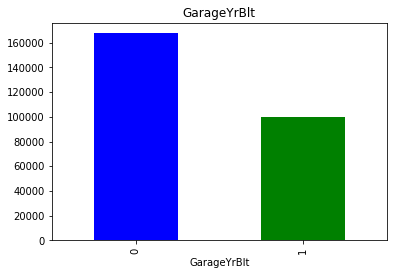

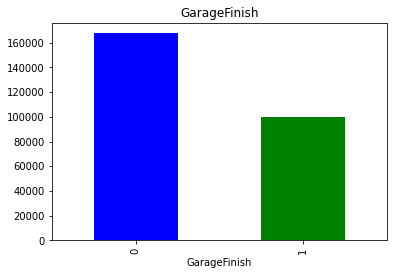

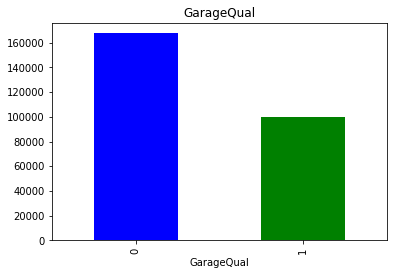

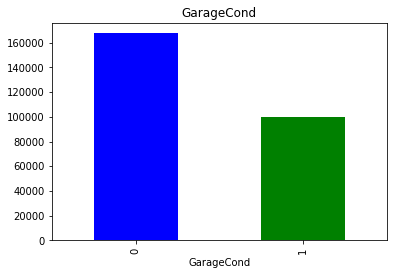

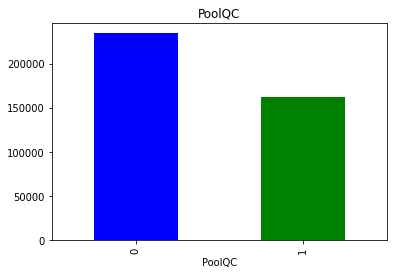

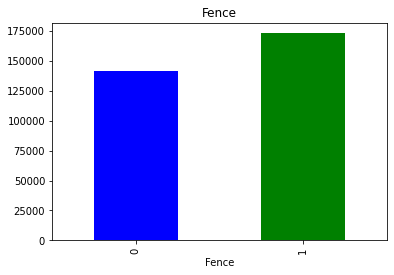

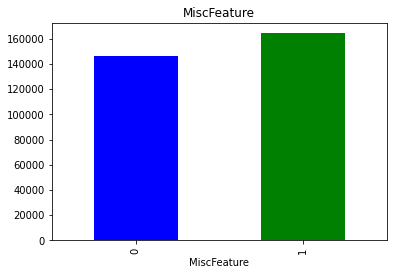

In [90]:
#check if the prices of records with na values and prices without them differ
for f in featuresNA :
  data = train_df.copy()

  data[f] = np.where(data[f].isna(), 1,0)

  data.groupby(f)['SalePrice'].median().plot.bar(color = mcolors.BASE_COLORS )
  plt.title(f)
  plt.show()


missing values are playing a role in the saleprice

In [91]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.963014,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.188793,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,1.000000,15500.000000,12.000000,2010.000000,755000.000000


In [92]:
categorial_features = [cat_feature for cat_feature in train_df.columns if train_df[cat_feature].dtypes=='object']

In [93]:
len(categorial_features)

43

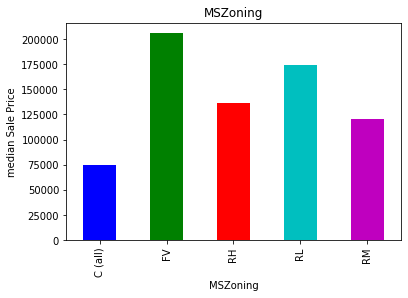

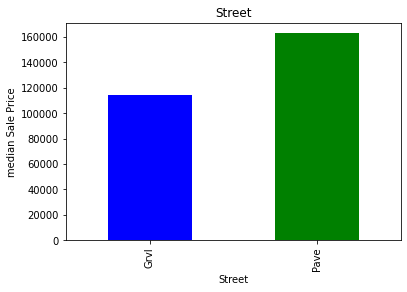

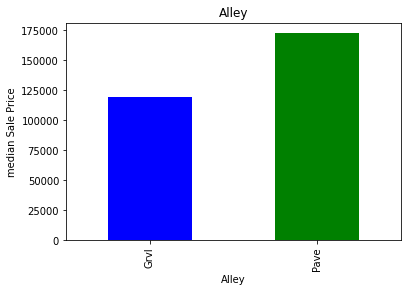

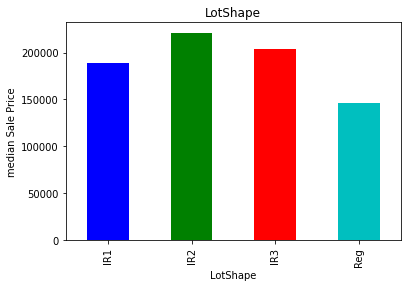

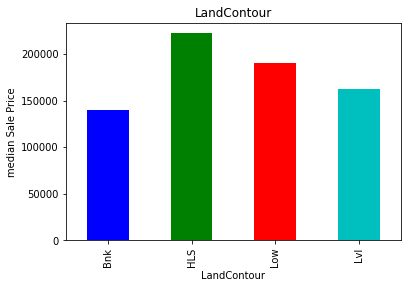

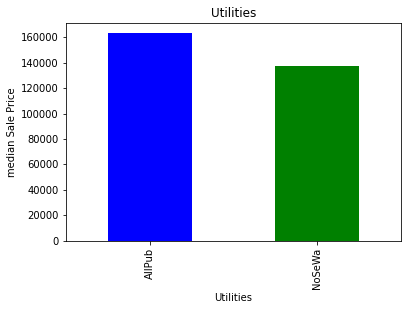

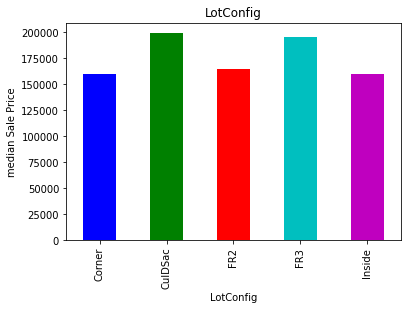

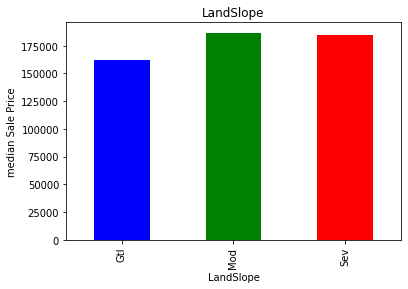

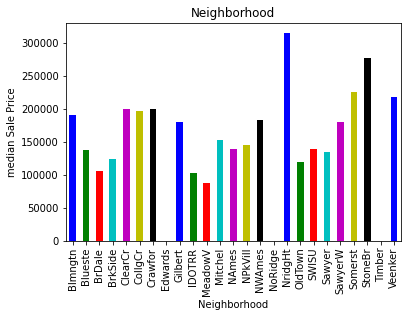

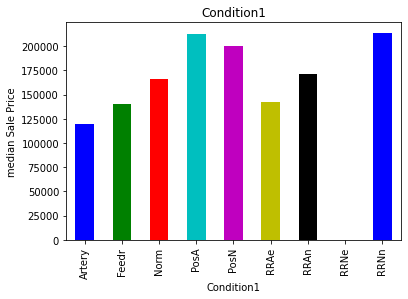

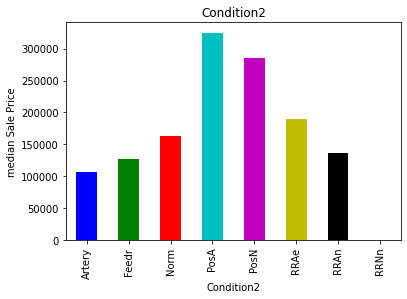

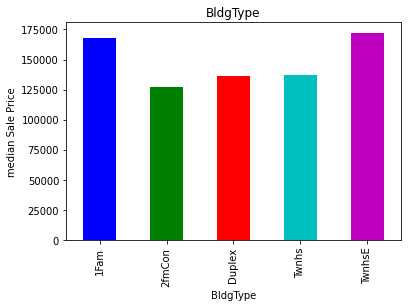

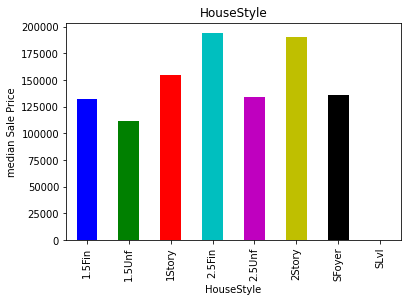

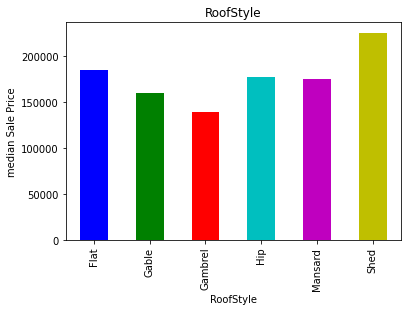

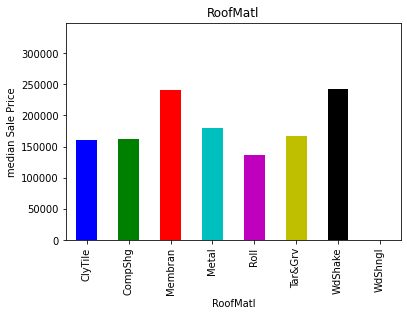

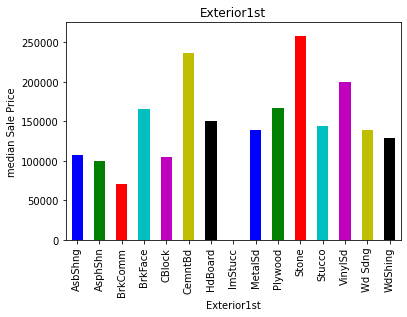

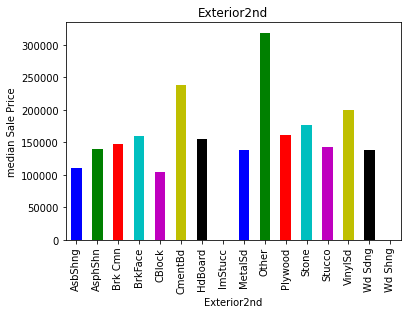

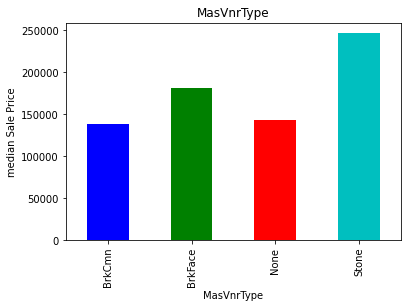

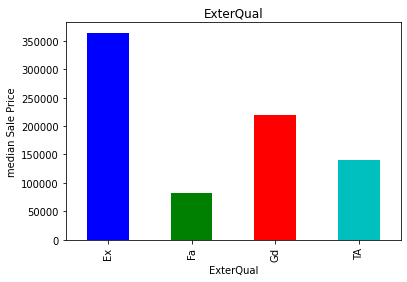

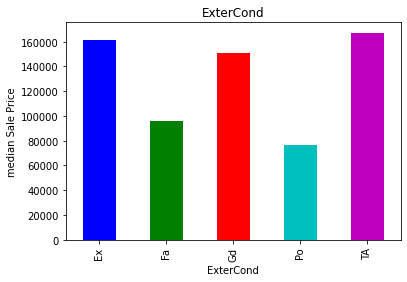

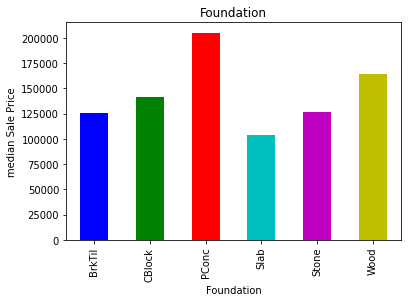

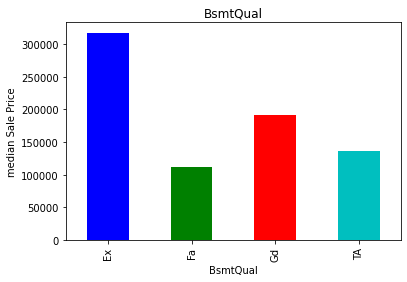

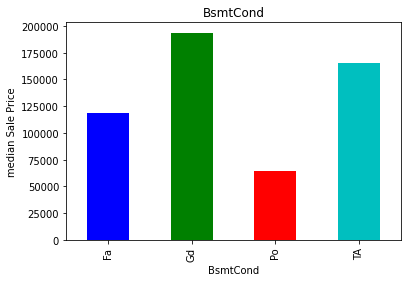

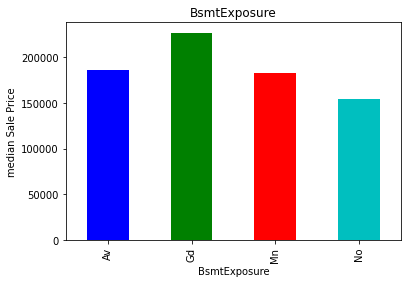

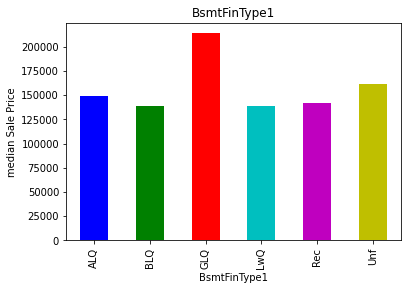

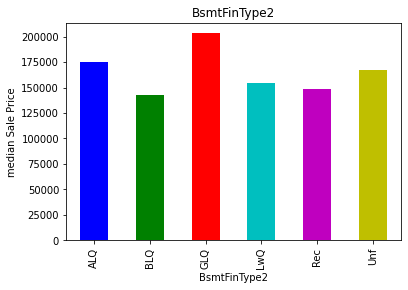

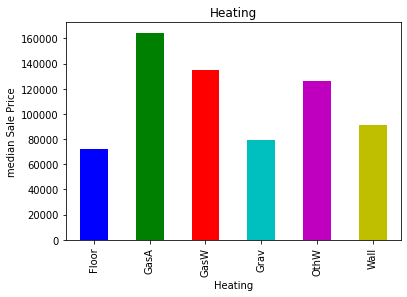

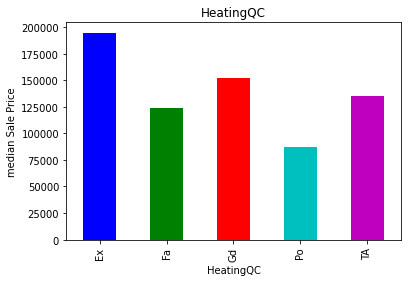

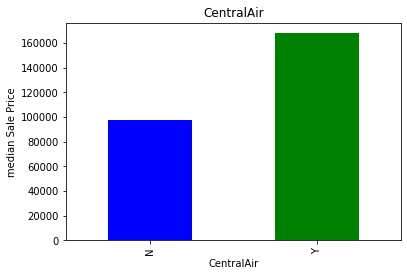

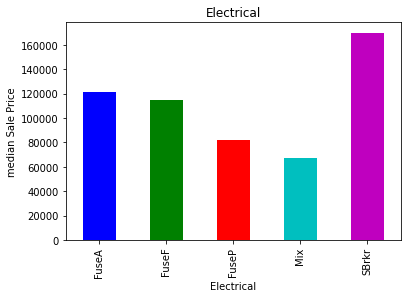

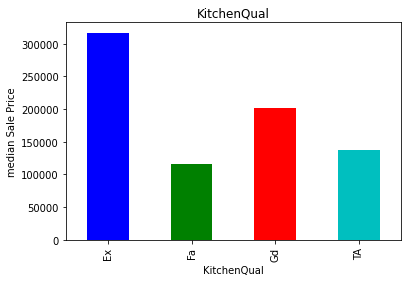

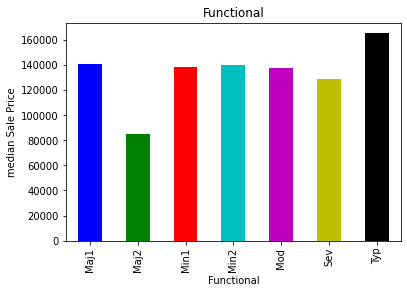

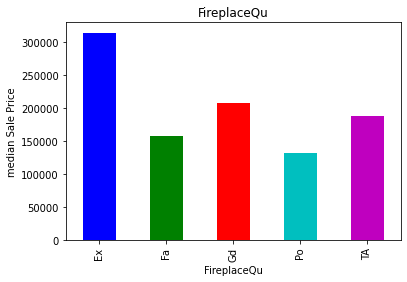

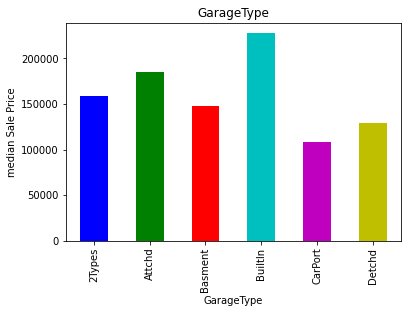

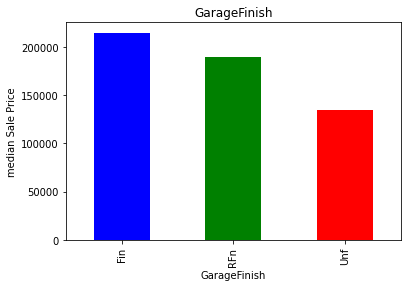

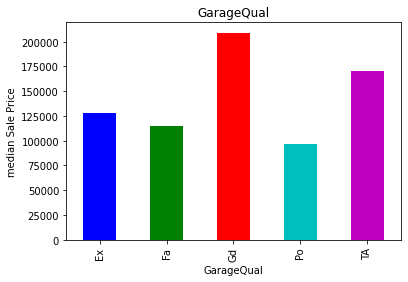

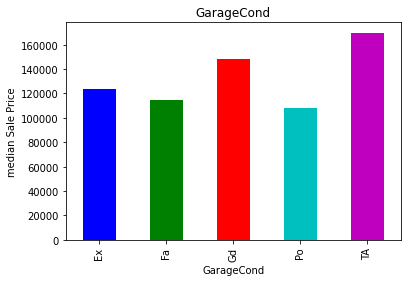

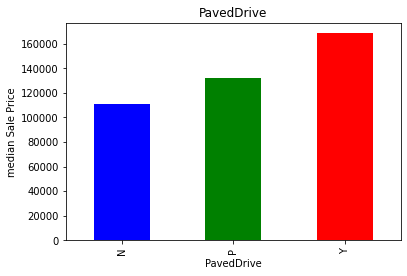

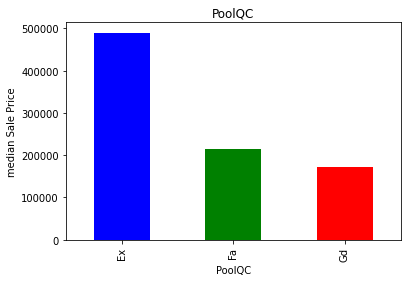

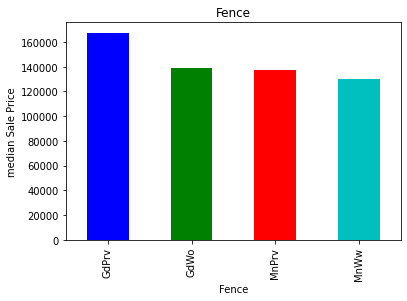

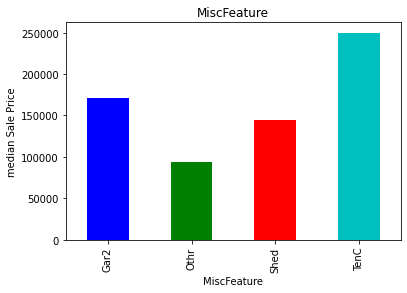

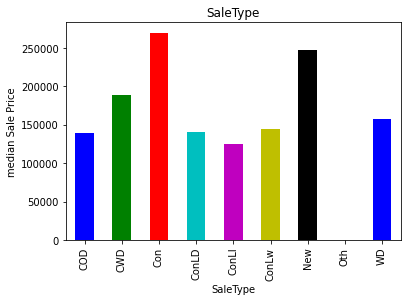

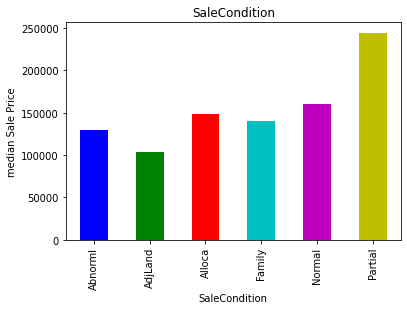

In [94]:
for cat_feature in categorial_features:
  train_df.groupby(cat_feature)['SalePrice'].median().plot.bar(color = mcolors.BASE_COLORS)
  plt.title(cat_feature)
  plt.ylabel("median Sale Price")
  plt.show()

Numerical values

In [95]:
numerical_features = [num_feature for num_feature in train_df.columns if train_df[num_feature].dtypes != 'object']

In [96]:
temporal_features = [temporal_feature for temporal_feature in numerical_features if 'Year' in temporal_feature  or 'Yr' in temporal_feature]

In [97]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

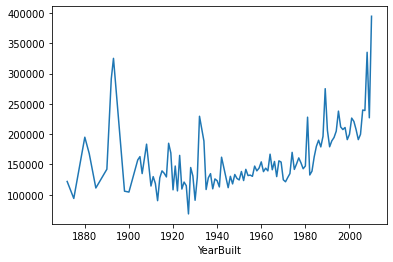

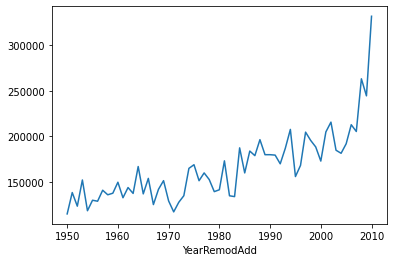

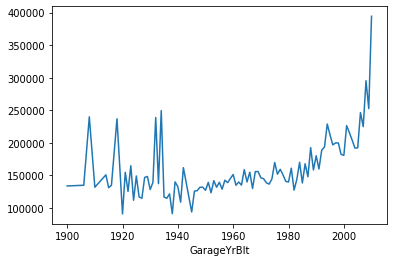

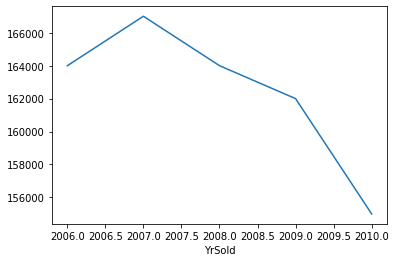

In [98]:

for feature in temporal_features:
  train_df.groupby(feature)['SalePrice'].median().plot()
  plt.show()

In [99]:
discrete_feature=[feature for feature in numerical_features if len(train_df[feature].unique())<50 and feature not in temporal_features+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


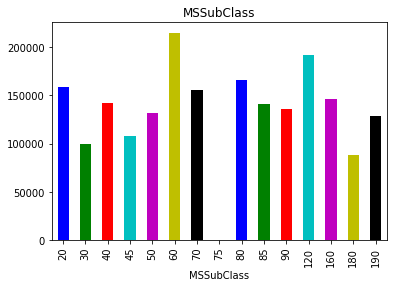

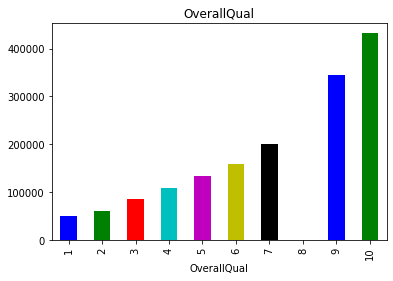

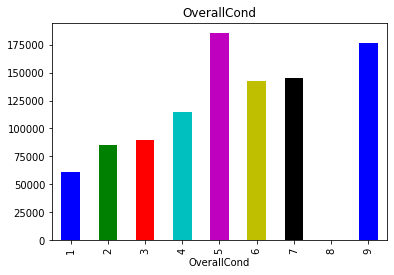

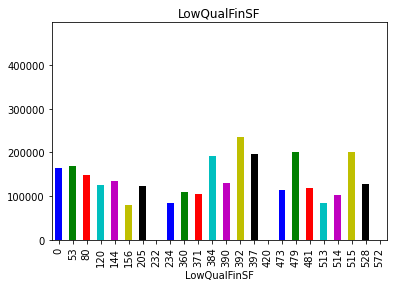

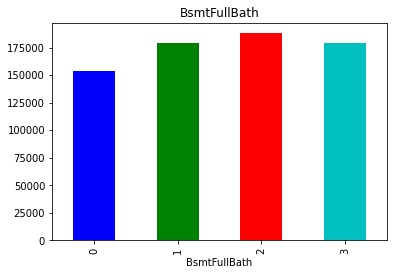

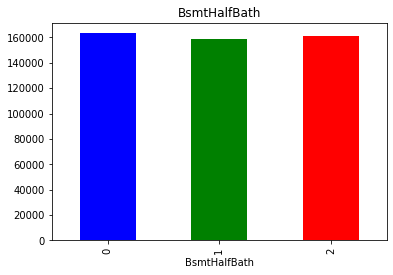

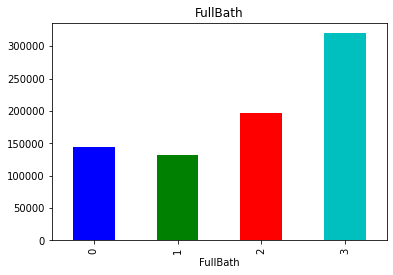

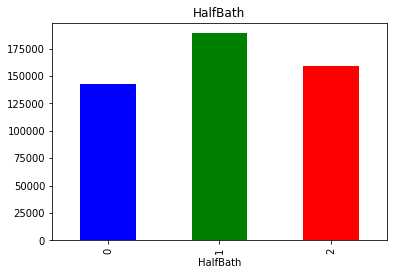

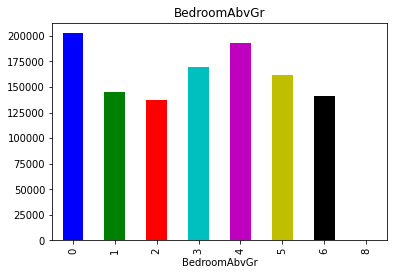

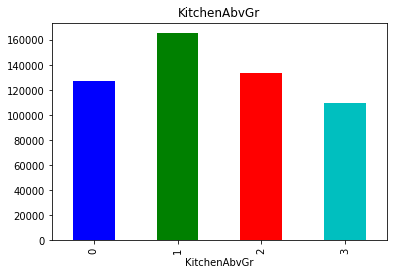

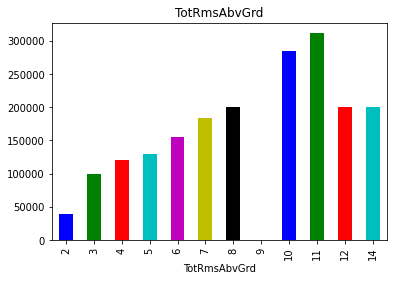

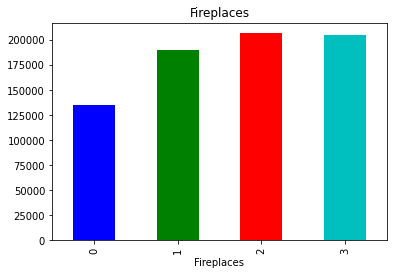

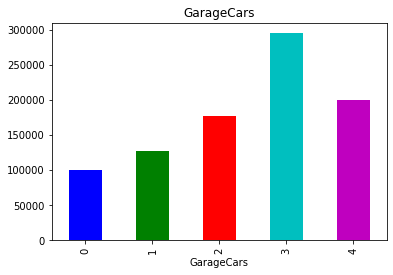

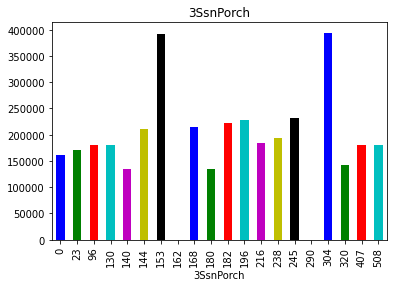

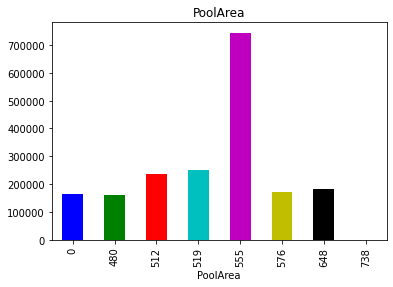

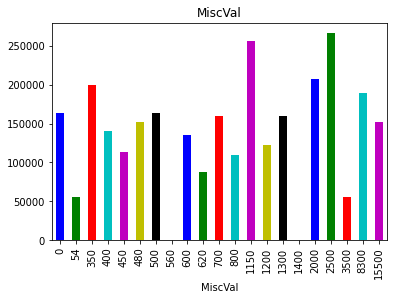

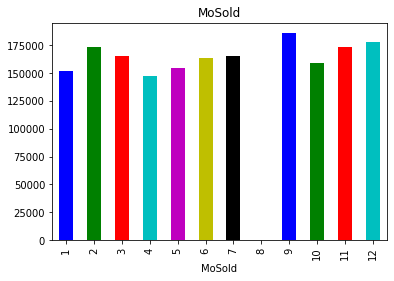

In [100]:
for discrete in discrete_feature:
  train_df.groupby(discrete)['SalePrice'].median().plot.bar(color = mcolors.BASE_COLORS)
  plt.title(discrete)
  plt.show()

In [101]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+temporal_features + ['Id'] ]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 16


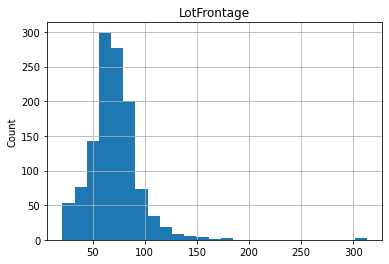

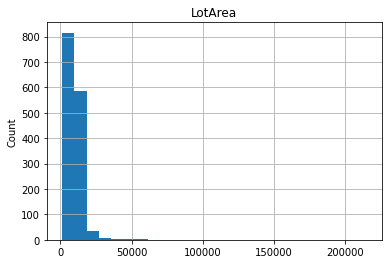

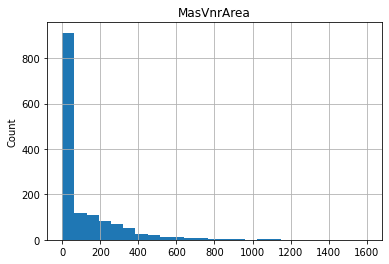

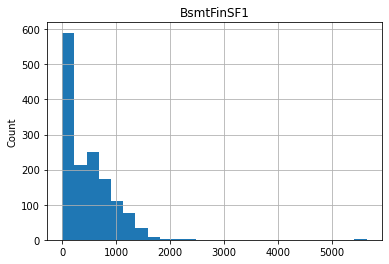

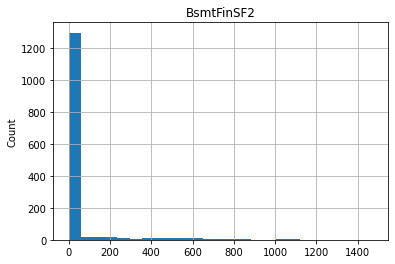

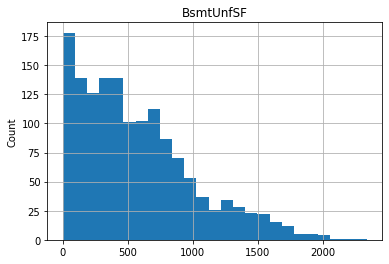

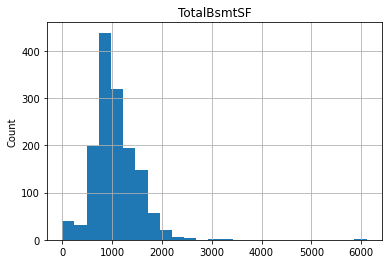

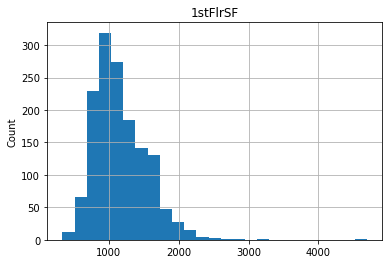

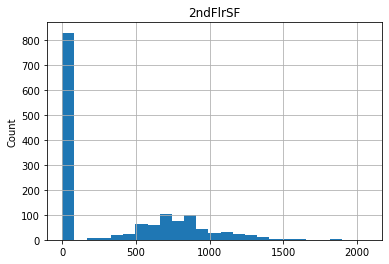

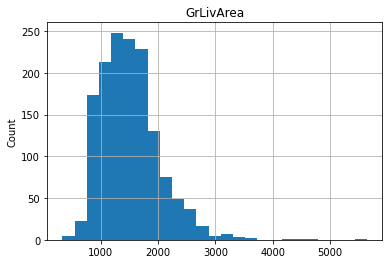

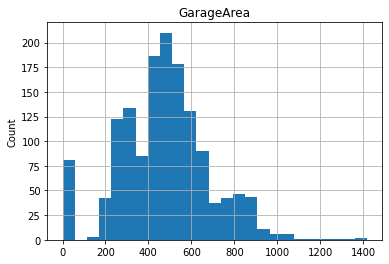

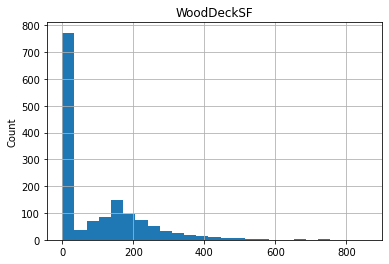

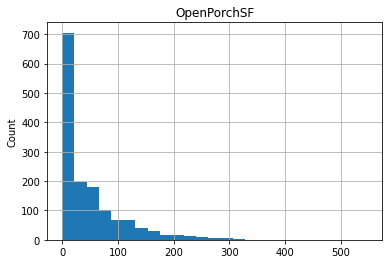

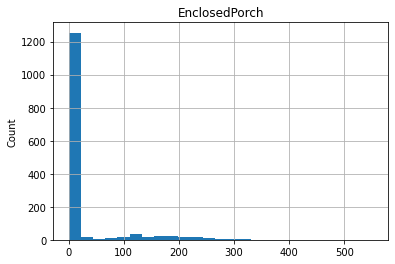

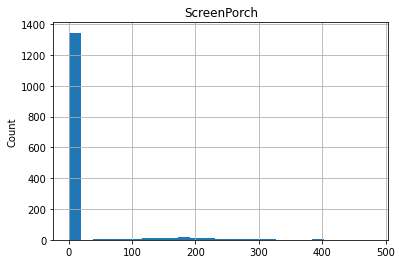

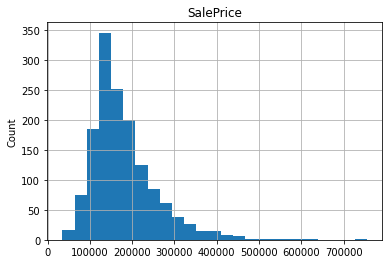

In [102]:
for continuous in continuous_features:

  train_df[continuous].hist(bins = 25)
  plt.ylabel("Count")
  plt.title(continuous)
  plt.show()


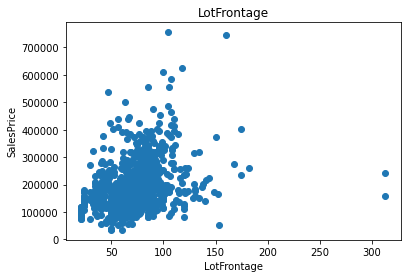

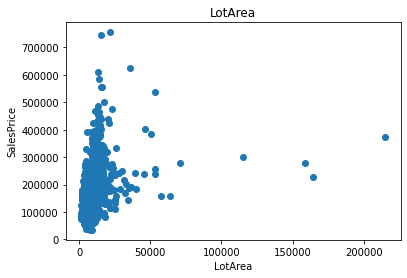

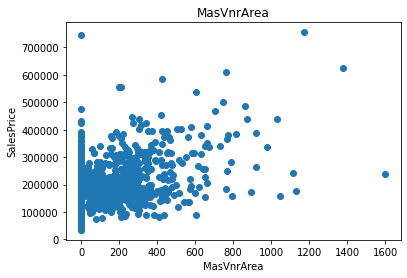

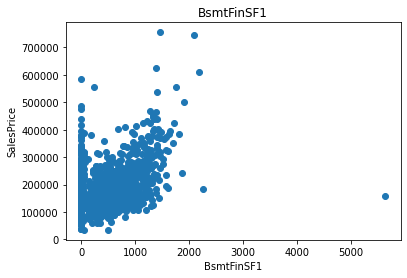

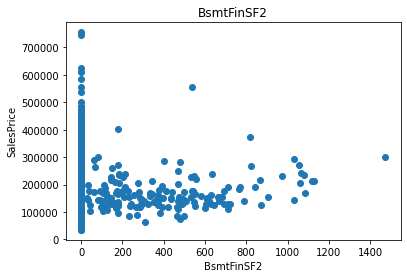

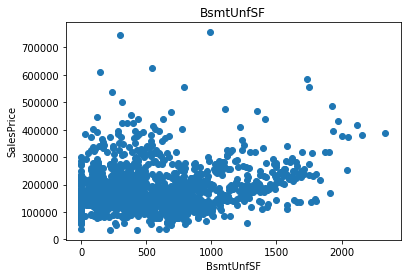

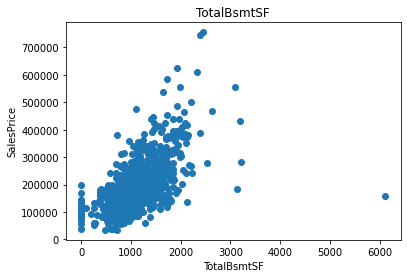

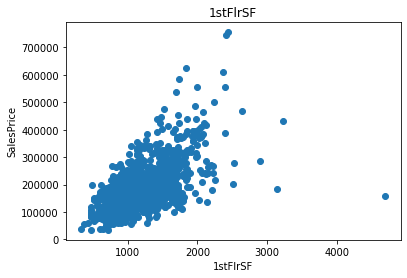

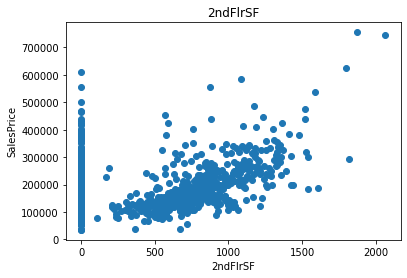

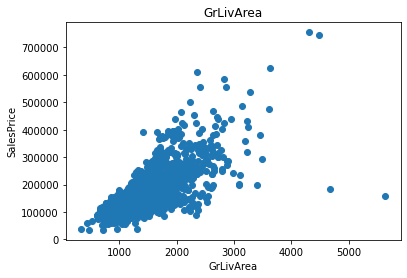

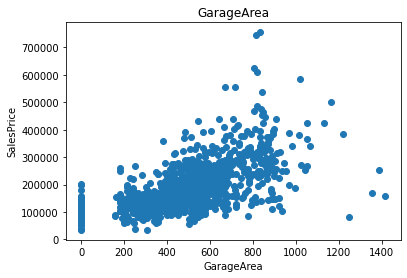

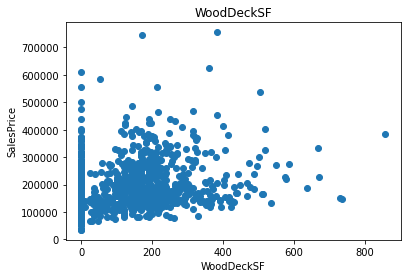

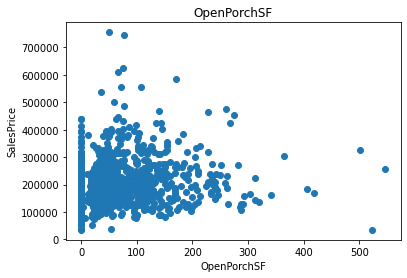

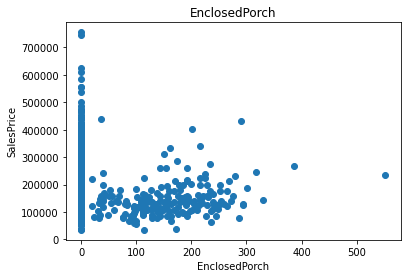

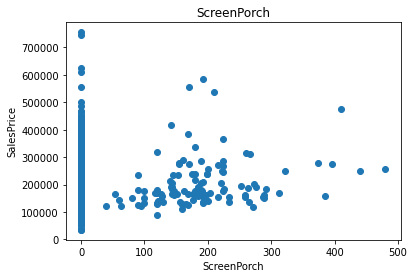

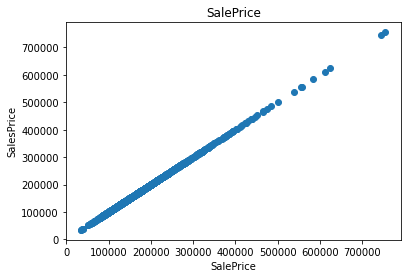

In [103]:
for continuous in continuous_features:
  plt.scatter(train_df[continuous], train_df['SalePrice'])
  plt.xlabel(continuous)
  plt.ylabel('SalesPrice')
  plt.title(continuous)
  plt.show()

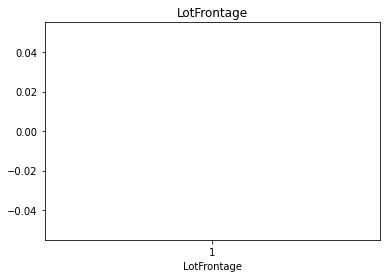

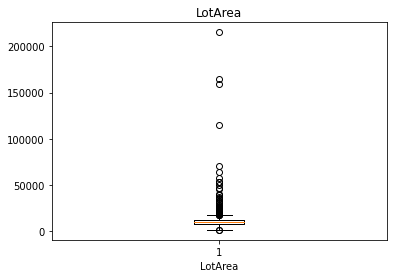

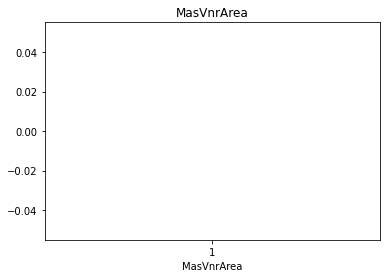

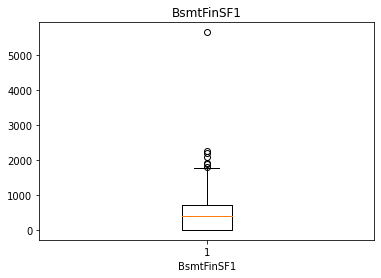

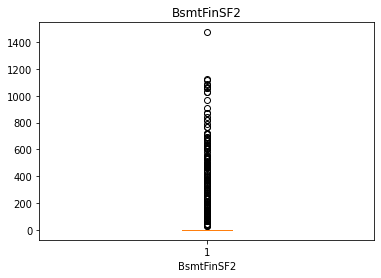

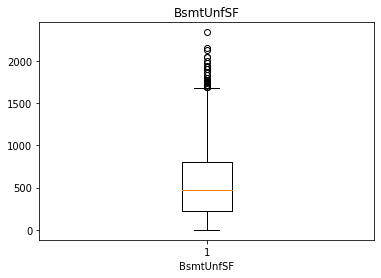

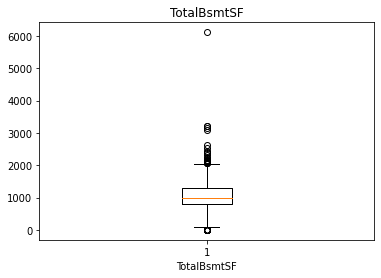

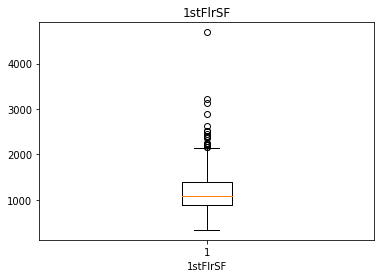

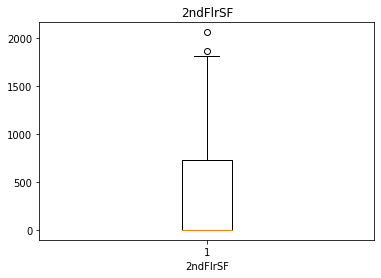

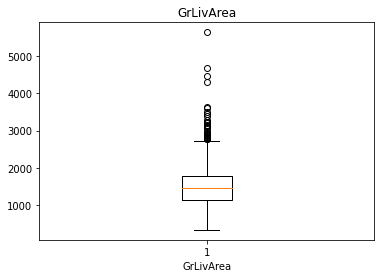

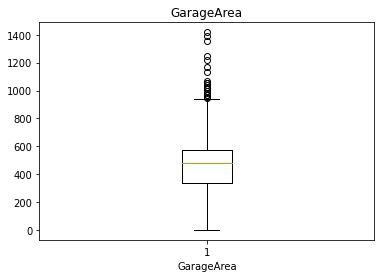

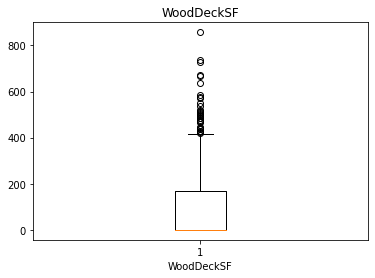

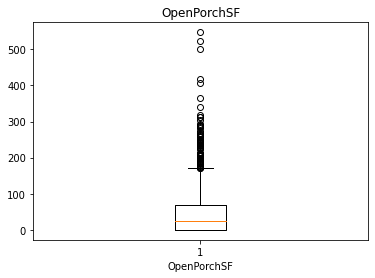

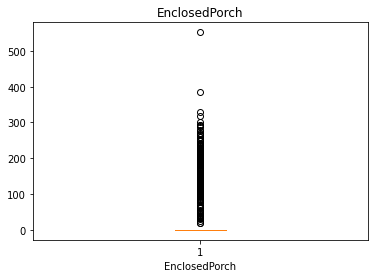

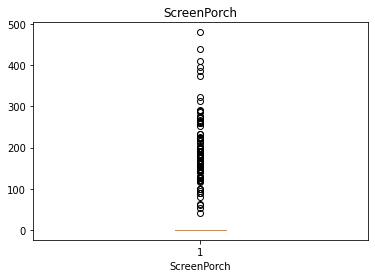

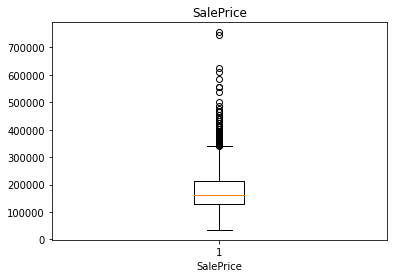

In [104]:
for continuous in continuous_features:
  plt.boxplot(train_df[continuous])
  plt.xlabel(continuous)
  plt.title(continuous)
  plt.show()

In [105]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

Text(0.5, 1.0, 'Correlation heatmap')

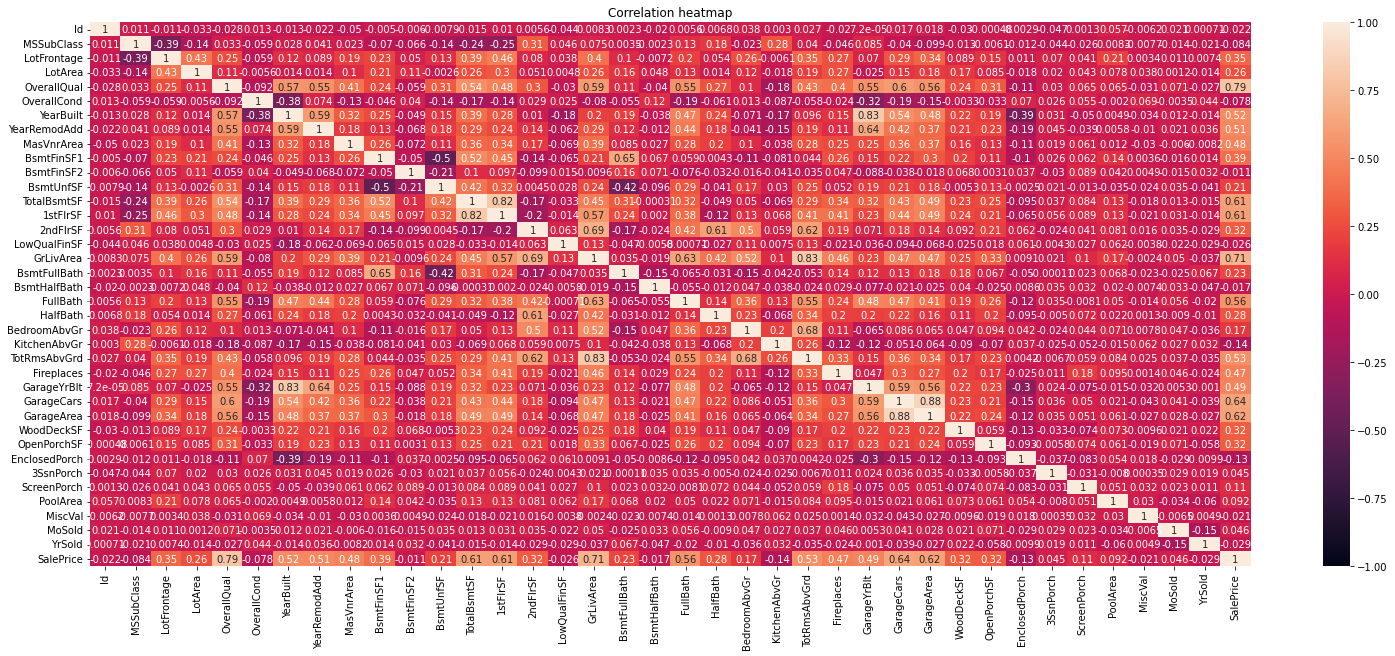

In [ ]:
from seaborn.matrix import heatmap
plt.figure(figsize=(26,10))
heatmap = sns.heatmap(train_df.corr(), vmin = -1, vmax=1, annot=True)
heatmap.set_title('Correlation heatmap')

In [106]:
#nan % in categorial features
nan_categorial_features = [f for f in categorial_features if train_df[f].isna().sum()>1]
for f in nan_categorial_features:
  print(f'{f} : {np.round(train_df[f].isna().mean(),4)}% nan values' )

Alley : 0.9377% nan values
MasVnrType : 0.0055% nan values
BsmtQual : 0.0253% nan values
BsmtCond : 0.0253% nan values
BsmtExposure : 0.026% nan values
BsmtFinType1 : 0.0253% nan values
BsmtFinType2 : 0.026% nan values
FireplaceQu : 0.4726% nan values
GarageType : 0.0555% nan values
GarageFinish : 0.0555% nan values
GarageQual : 0.0555% nan values
GarageCond : 0.0555% nan values
PoolQC : 0.9952% nan values
Fence : 0.8075% nan values
MiscFeature : 0.963% nan values


In [107]:
#replace nan in categorial features with unknown
for f in nan_categorial_features:
  train_df[f] =train_df[f].fillna("unknown")

train_df[nan_categorial_features].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [108]:
#nan in temporal features
nan_temporal_features = [f for f in temporal_features if train_df[f].isna().sum()>1]

nan_temporal_features

['GarageYrBlt']

In [109]:
#replace with median because it influence saleprice and has outliners
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

In [110]:
#nan in numerical features
nan_numerical_features = [f for f in numerical_features if train_df[f].isna().sum()>1]

In [111]:
nan_numerical_features

['LotFrontage', 'MasVnrArea']

In [112]:
for f in nan_numerical_features:
  train_df[f]= train_df[f].fillna(train_df[f].median())

In [113]:
train_df[nan_numerical_features].isna().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

In [ ]:
#Since the numerical variables are skewed we will perform log normal distribution


In [114]:


scaling_feature=[feature for feature in train_df.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

print(scaling_feature)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [115]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,unknown,unknown,unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,unknown,unknown,unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,unknown,unknown,unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,unknown,unknown,unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,unknown,unknown,unknown,0,12,2008,WD,Normal,250000


In [116]:
for feature in categorial_features:
    labels_ordered=train_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_df[feature]=train_df[feature].map(labels_ordered)




#Feature Scaling




In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[scaling_feature])

MinMaxScaler()

In [164]:
scaler.transform(train_df[scaling_feature])

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 0.5       ,
        0.8       ]])

In [165]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_df[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [166]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,208500,0.235294,0.75,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.949275,0.883333,0.2,0.285714,0.785714,0.800000,0.50,0.12250,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.936364,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.090909,0.50,0.5,0.8
1,2,181500,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.833333,0.25,0.571429,1.0,0.714286,0.555556,0.875,0.753623,0.433333,0.2,0.285714,0.285714,0.333333,0.25,0.00000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.690909,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.363636,0.25,0.5,0.8
2,3,223500,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.666667,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.934783,0.866667,0.2,0.285714,0.785714,0.800000,0.50,0.10125,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.918182,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.727273,0.50,0.5,0.8
3,4,140000,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.708333,0.50,0.571429,1.0,0.857143,0.666667,0.500,0.311594,0.333333,0.2,0.285714,0.357143,0.533333,0.25,0.00000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.890909,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.090909,0.00,0.5,0.2
4,5,250000,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.50,0.571429,1.0,0.857143,0.777778,0.500,0.927536,0.833333,0.2,0.285714,0.785714,0.800000,0.50,0.21875,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.909091,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,1.000000,0.50,0.5,0.8


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   SalePrice      1460 non-null   int64  
 2   MSSubClass     1460 non-null   float64
 3   MSZoning       1460 non-null   float64
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   float64
 6   Street         1460 non-null   float64
 7   Alley          1460 non-null   float64
 8   LotShape       1460 non-null   float64
 9   LandContour    1460 non-null   float64
 10  Utilities      1460 non-null   float64
 11  LotConfig      1460 non-null   float64
 12  LandSlope      1460 non-null   float64
 13  Neighborhood   1460 non-null   float64
 14  Condition1     1460 non-null   float64
 15  Condition2     1460 non-null   float64
 16  BldgType       1460 non-null   float64
 17  HouseStyle     1460 non-null   float64
 18  OverallQ

In [168]:
data = data.fillna(0)

In [169]:
#data = data.drop('Id', 1)
import numpy as np

rng = np.random.RandomState(0)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice',1), data['SalePrice'], random_state=rng)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [170]:
model = LinearRegression()
X_train.drop('Id',1,inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [171]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1292,0.294118,0.25,0.133562,0.024773,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.208333,0.500,0.571429,1.0,0.857143,0.444444,0.375,0.144928,0.250000,0.2,0.285714,0.357143,0.266667,0.25,0.000000,0.333333,0.75,0.6,0.50,0.75,0.25,0.833333,0.000000,0.833333,0.000000,0.425514,0.162684,1.0,0.50,0.0,1.0,0.239559,0.481356,0.0,0.383949,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.750000,0.333333,0.000000,0.2,0.833333,0.772727,0.666667,0.25,0.304654,0.6,1.0,1.0,0.000000,0.524680,0.0,0.0,0.0,0.000000,0.000000,1.00,0.75,0.0,1.000000,0.75,0.5,0.8
1018,0.352941,0.75,0.164384,0.044329,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.583333,0.500,0.571429,1.0,0.571429,0.666667,0.500,0.862319,0.700000,0.2,0.285714,0.571429,0.600000,0.50,0.047500,0.666667,0.75,1.0,0.75,0.75,0.25,0.833333,0.000000,0.833333,0.000000,0.164384,0.062848,1.0,0.75,1.0,1.0,0.107389,0.324455,0.0,0.214393,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.6,0.833333,0.827273,0.666667,0.50,0.283498,0.6,1.0,1.0,0.191365,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.00,0.75,0.0,0.363636,0.25,0.5,0.8
1213,0.352941,0.75,0.164384,0.041814,1.0,1.0,0.333333,0.333333,1.0,1.00,0.0,0.250000,0.500,0.571429,1.0,0.571429,0.333333,1.000,0.673913,0.850000,0.2,0.285714,0.785714,0.800000,0.25,0.000000,0.333333,0.50,0.4,0.50,1.00,0.75,1.000000,0.114812,0.833333,0.000000,0.000000,0.106056,1.0,1.00,1.0,1.0,0.143644,0.000000,0.0,0.117935,0.333333,0.5,0.000000,0.0,0.000,0.333333,0.333333,0.083333,1.000000,0.000000,0.2,0.833333,0.590909,0.333333,0.25,0.256700,0.6,1.0,1.0,0.102684,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.00,0.75,0.0,0.363636,0.00,0.5,0.8
1430,0.235294,0.75,0.133562,0.096427,1.0,1.0,0.666667,0.333333,1.0,0.00,0.0,0.583333,0.375,0.571429,1.0,0.857143,0.444444,0.500,0.963768,0.916667,0.2,0.285714,0.785714,0.800000,0.25,0.000000,0.666667,0.75,1.0,0.75,1.00,0.75,0.833333,0.000000,0.833333,0.000000,0.313356,0.119804,1.0,1.00,1.0,1.0,0.091785,0.534625,0.0,0.283346,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.416667,1.000000,0.333333,0.8,1.000000,0.954545,1.000000,0.50,0.262341,0.6,1.0,1.0,0.116686,0.073126,0.0,0.0,0.0,0.000000,0.000000,1.00,0.75,0.0,0.545455,0.00,0.5,0.8
810,0.000000,0.75,0.195205,0.041319,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.541667,0.500,0.571429,1.0,0.714286,0.555556,0.625,0.739130,0.816667,0.8,0.285714,0.571429,0.600000,0.50,0.061875,0.333333,0.75,0.4,0.50,0.75,0.25,0.666667,0.117470,0.333333,0.255767,0.000000,0.170213,1.0,0.25,1.0,1.0,0.223726,0.000000,0.0,0.183685,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.000000,0.333333,0.4,0.833333,0.672727,0.666667,0.50,0.341326,0.6,1.0,1.0,0.309218,0.000000,0.0,0.0,0.0,0.878049,0.666667,0.75,0.75,0.0,0.000000,0.00,0.5,0.8


In [172]:
y_train.head()

1292    107500
1018    160000
1213    145000
1430    192140
810     181000
Name: SalePrice, dtype: int64

In [173]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,530,0.000000,0.75,0.164384,0.146617,1.0,1.0,0.333333,0.333333,1.0,1.0,0.0,0.708333,0.5,0.571429,1.0,0.714286,0.555556,0.250,0.615942,0.416667,0.8,0.285714,0.357143,0.466667,0.75,0.000000,0.666667,0.75,1.0,0.50,0.75,0.25,0.166667,0.215982,0.833333,0.00000,0.349315,0.333061,1.0,0.5,1.0,1.00,0.500459,0.000000,0.0,0.410889,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.666667,0.666667,0.6,0.833333,0.681818,0.666667,0.50,0.341326,0.6,1.0,1.0,0.000000,0.000000,0.362319,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.181818,0.25,0.5,0.6
491,492,0.176471,0.75,0.198630,0.038281,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.416667,0.0,0.571429,1.0,0.285714,0.555556,0.750,0.500000,0.000000,0.2,0.285714,0.357143,0.266667,0.25,0.000000,0.333333,0.75,0.4,0.50,0.75,0.25,0.333333,0.071403,0.500000,0.11194,0.101884,0.131915,1.0,0.5,1.0,0.75,0.143185,0.300242,0.0,0.234363,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,1.000000,0.666667,0.6,0.833333,0.372727,0.333333,0.25,0.169252,0.6,1.0,1.0,0.000000,0.000000,0.057971,0.0,0.0,0.0,0.0,0.5,0.75,0.0,0.636364,0.00,0.5,0.8
459,460,0.176471,0.75,0.164384,0.026712,1.0,1.0,0.333333,0.000000,1.0,0.5,0.0,0.125000,0.5,0.571429,1.0,0.285714,0.444444,0.375,0.565217,0.000000,0.2,0.285714,0.285714,0.333333,0.00,0.100625,0.333333,0.75,0.4,0.50,0.75,0.25,0.500000,0.032778,0.833333,0.00000,0.224315,0.116039,1.0,0.5,1.0,1.00,0.148004,0.108475,0.0,0.163715,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,1.000000,0.333333,0.6,0.333333,0.454545,0.333333,0.25,0.248237,0.6,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.545455,0.75,0.5,0.8
279,280,0.235294,0.75,0.212329,0.040688,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.750000,0.5,0.571429,1.0,0.857143,0.666667,0.500,0.760870,0.450000,0.8,0.285714,0.642857,0.666667,0.50,0.186875,0.333333,0.75,0.4,0.75,0.75,0.25,0.333333,0.069454,0.833333,0.00000,0.328767,0.189853,1.0,1.0,1.0,1.00,0.188619,0.419370,0.0,0.318011,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,1.000000,0.333333,0.6,0.833333,0.700000,1.000000,0.50,0.356135,0.6,1.0,1.0,0.336056,0.213894,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.181818,0.50,0.5,0.8
655,656,0.823529,0.25,0.000000,0.001776,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.083333,0.5,0.571429,0.5,0.857143,0.555556,0.500,0.717391,0.350000,0.2,0.285714,0.571429,0.933333,0.50,0.238125,0.333333,0.75,0.4,0.50,0.75,0.25,0.833333,0.000000,0.833333,0.00000,0.224743,0.085925,1.0,0.5,1.0,1.00,0.043827,0.274576,0.0,0.142803,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.000000,0.000000,0.2,0.333333,0.645455,0.333333,0.25,0.186178,0.6,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.181818,1.00,0.5,0.4


In [174]:
model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.883003528669343


In [175]:
X_test.drop('Id',1,inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [176]:
y= np.array(y_test)

In [184]:
y_pred = model.predict(X_test)
